## Word embeddings
### Case Study: Support Ticket Classification using Word2Vec

In [1]:
# download data
!wget https://thinkingneuron.com/wp-content/uploads/2021/12/supportTicketData.csv

--2022-05-31 04:48:00--  https://thinkingneuron.com/wp-content/uploads/2021/12/supportTicketData.csv
Resolving thinkingneuron.com (thinkingneuron.com)... 68.66.224.28
Connecting to thinkingneuron.com (thinkingneuron.com)|68.66.224.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5893230 (5.6M) [text/csv]
Saving to: ‘supportTicketData.csv’

supportTicketData.c 100%[===================>]   5.62M  11.9MB/s    in 0.5s    

2022-05-31 04:48:01 (11.9 MB/s) - ‘supportTicketData.csv’ saved [5893230/5893230]



## Reading the support ticket data
This data contains 19,796 rows and 2 columns. The column”body” represents the ticket description and the column “urgency” represents the Priority.

In [7]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
 
# Reading the data
TicketData=pd.read_csv('supportTicketData.csv')
 
# Printing number of rows and columns
print(TicketData.shape)
 
# Printing sample rows
TicketData.head(10)

(19796, 2)


,body,urgency
0,connection issues with assigned address hi fac...,P1
1,cannot access hi cannot access fallowing link ...,P2
2,re address shown valid dear colleagues remarke...,P1
3,sent tuesday critical alert following alert oc...,P2
4,code spelling mistake hello should discover fo...,P2
5,annual leave hello sent last week about previo...,P2
6,report working hello dear last two weeks have ...,P2
7,more access lost access please reset password ...,P1
8,open credentials required please assist instal...,P1
9,dear please ask our supplier for price quotati...,P2


## Visualising the distribution of the Target variable
Now we try to see if the Target variable has a balanced distribution or not? Basically each priority type has enough rows to be learned.

If the data would have been imbalanced, for example very less number of rows for the P1 category, then you need to balance the data using any of the popular techniques like over-sampling, under-sampling, or SMOTE.

urgency
P1    6748
P2    5528
P3    7520
dtype: int64


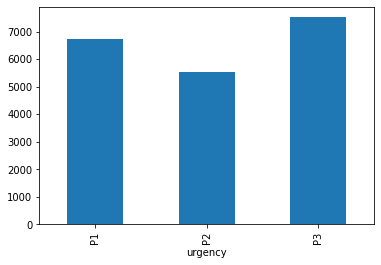

In [8]:
# You can see there are 3 ticket types
print(TicketData.groupby('urgency').size())
 
# Plotting the bar chart
%matplotlib inline
TicketData.groupby('urgency').size().plot(kind='bar');

## Count Vectorization: converting text data to numeric
This step will help to remove all the stopwords and create a document term matrix.

We will use this matrix to do further processing. For each word in the document term matrix, we will use the Word2Vec numeric vector representation.

In [9]:
# Count vectorization of text
from sklearn.feature_extraction.text import CountVectorizer
 
# Ticket Data
corpus = TicketData['body'].values
 
# Creating the vectorizer
vectorizer = CountVectorizer(stop_words='english')
 
# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)
 
#print(vectorizer.get_feature_names())
 
# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
CountVectorizedData['Priority']=TicketData['urgency']
print(CountVectorizedData.shape)
CountVectorizedData.head()

(19796, 9100)


,ab,abandon,abandoned,abc,abeam,abilities,ability,able,abnormal,abnormally,...,zig,zip,zipped,zipper,zipping,zone,zones,zoom,zooming,Priority
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P2


## Word2Vec conversion:
Now we will use the Word2Vec representation of words to convert the above document term matrix to a smaller matrix, where the columns are the sum of the vectors for each word present in the document.

For example, look at the below diagram. The flow is shown for one sentence, the same happens for every sentence in the corpus.

The numeric representation of each word is taken from Word2Vec.
All the vectors are added, hence producing a single vector
That single vector represents the information of the sentence, hence treated as one row.

![](	https://thinkingneuron.com/wp-content/uploads/2021/12/image-74.png)

## Downloading Google’s word2Vec model
* We will Use the Pre-trained word2Vec model from 
google, It contains word vectors for a vocabulary of 3 million words.
* Trained on around 100 billion words from the google news dataset.

In [13]:
# !wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

import gensim.downloader as api

GoogleModel = api.load('word2vec-google-news-300')


In [14]:
# GoogleModel['hello'].shape
GoogleModel['hello'].shape

(300,)

In [15]:
# Looking at a sample vector for a word
GoogleModel['hello']

array([-0.05419922,  0.01708984, -0.00527954,  0.33203125, -0.25      ,
       -0.01397705, -0.15039062, -0.265625  ,  0.01647949,  0.3828125 ,
       -0.03295898, -0.09716797, -0.16308594, -0.04443359,  0.00946045,
        0.18457031,  0.03637695,  0.16601562,  0.36328125, -0.25585938,
        0.375     ,  0.171875  ,  0.21386719, -0.19921875,  0.13085938,
       -0.07275391, -0.02819824,  0.11621094,  0.15332031,  0.09082031,
        0.06787109, -0.0300293 , -0.16894531, -0.20800781, -0.03710938,
       -0.22753906,  0.26367188,  0.012146  ,  0.18359375,  0.31054688,
       -0.10791016, -0.19140625,  0.21582031,  0.13183594, -0.03515625,
        0.18554688, -0.30859375,  0.04785156, -0.10986328,  0.14355469,
       -0.43554688, -0.0378418 ,  0.10839844,  0.140625  , -0.10595703,
        0.26171875, -0.17089844,  0.39453125,  0.12597656, -0.27734375,
       -0.28125   ,  0.14746094, -0.20996094,  0.02355957,  0.18457031,
        0.00445557, -0.27929688, -0.03637695, -0.29296875,  0.19

In [1]:
# Finding similar words
# The most_similar() function finds the cosine similarity of the given word with 
# other words using the word2Vec representations of each word
GoogleModel.most_similar('king', topn=5)


NameError: ignored

## Converting every sentence to a numeric vector
For each word in a sentence, we extract the numeric form of the word and then simply add all the numeric forms for that sentence to represent the sentence.

In [3]:
def FunctionText2Vec(inpTextData):
    # Converting the text to numeric data
    X = vectorizer.transform(inpTextData)
    CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
    
    # Creating empty dataframe to hold sentences
    W2Vec_Data=pd.DataFrame()
    
    # Looping through each row for the data
    for i in range(CountVecData.shape[0]):
 
        # initiating a sentence with all zeros
        Sentence = np.zeros(300)
 
        # Looping thru each word in the sentence and if its present in 
        # the Word2Vec model then storing its vector
        for word in WordsVocab[CountVecData.iloc[i,:]>=1]:
            #print(word)
            if word in GoogleModel.key_to_index.keys():    
                Sentence=Sentence+GoogleModel[word]
        # Appending the sentence to the dataframe
        W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
    return(W2Vec_Data)

In [2]:
# Since there are so many words... This will take some time :( 
# Calling the function to convert all the text data to Word2Vec Vectors
W2Vec_Data=FunctionText2Vec(TicketData['body'])
 
# Checking the new representation for sentences
W2Vec_Data.shape

NameError: ignored

In [ ]:
# Comparing the above with the document term matrix
CountVectorizedData.shape

## Preparing Data for ML

In [ ]:
# Adding the target variable
W2Vec_Data.reset_index(inplace=True, drop=True)
W2Vec_Data['Priority']=CountVectorizedData['Priority']
 
# Assigning to DataForML variable
DataForML=W2Vec_Data
DataForML.head()

## Splitting the data into training and testing

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable=DataForML.columns[-1]
Predictors=DataForML.columns[:-1]
 
X=DataForML[Predictors].values
y=DataForML[TargetVariable].values
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)
 
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Standardization/Normalization
This is an optional step. It can speed up the processing of the model training.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization is used because we need to fit Naive Bayes
 
# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
 
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)
 
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Naive Bayes
This algorithm trains very fast! The accuracy may not be very high always but the speed is guaranteed!

I have commented the cross-validation section just to save computing time. You can uncomment and execute those commands as well.

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
#clf = GaussianNB()
clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 5-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))